2025-07-10 20:21:41.825454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752157302.750325   15150 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752157303.003262   15150 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752157305.039574   15150 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752157305.039597   15150 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752157305.039598   15150 computation_placer.cc:177] computation placer alr

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 131ms/step - loss: 0.0197 - val_loss: 0.0080
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 97s 247ms/step - loss: 0.0077 - val_loss: 0.0073
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 94s 241ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 214ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 97s 247ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 95s 242ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 85s 218ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 98s 249ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 94s 240ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 236ms/step - loss: 0.0054 - val_loss: 0.0056
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 97s 247ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 12/20
391/39

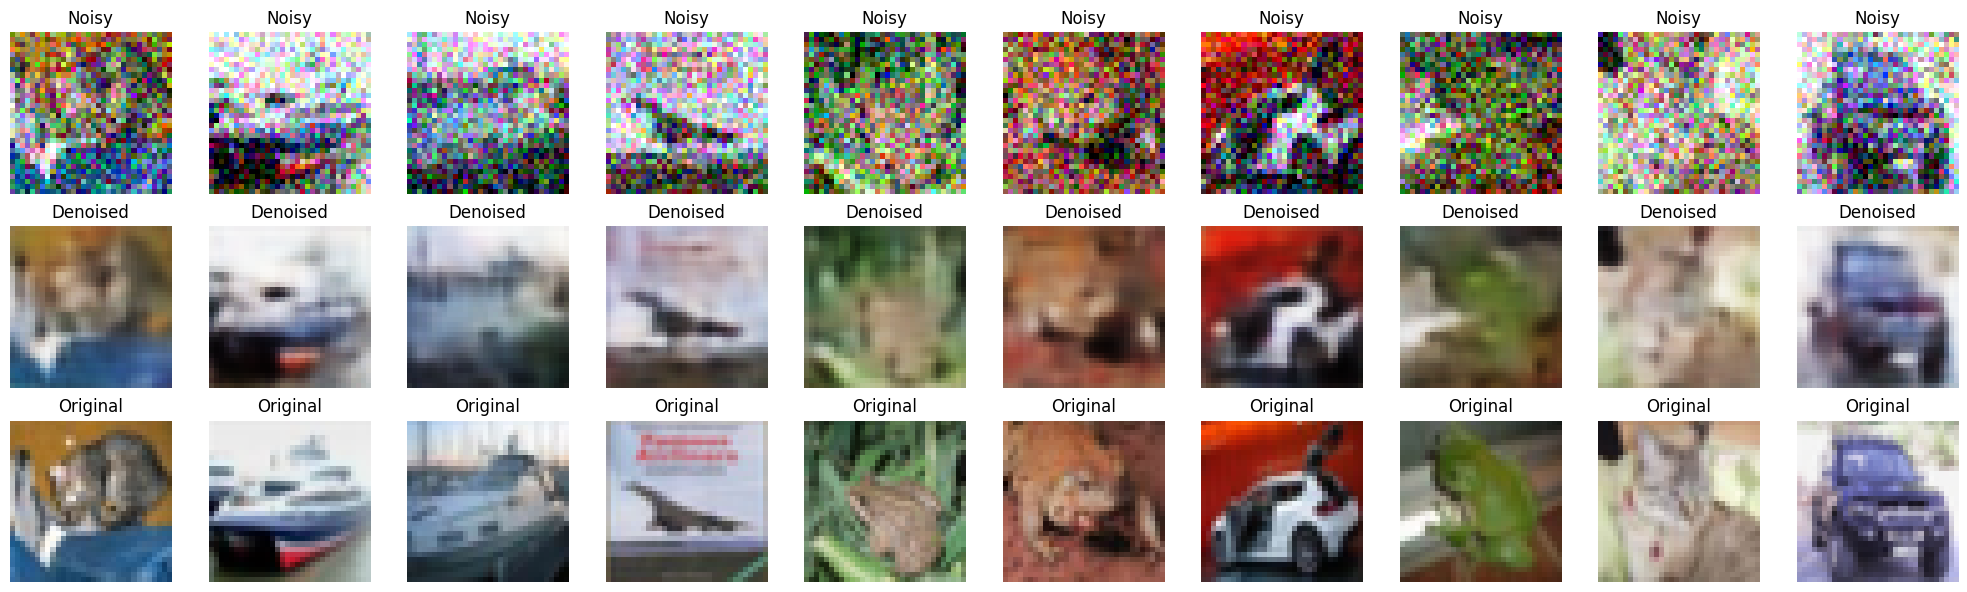

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load and Normalize CIFAR-10
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Add Gaussian Noise 
noise_factor = 0.2
noise_train = noise_factor * np.random.normal(0.0, 1.0, x_train.shape).astype(np.float32)
noise_test  = noise_factor * np.random.normal(0.0, 1.0, x_test.shape).astype(np.float32)

x_train_noisy = np.clip(x_train + noise_train, 0., 1.)
x_test_noisy  = np.clip(x_test + noise_test, 0., 1.)

# Build Denoising Autoencoder 
def build_denoising_autoencoder():
    input_img = layers.Input(shape=(32, 32, 3))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    return models.Model(input_img, decoded)

# Compile model
autoencoder = build_denoising_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                verbose=1)

# Visualize Results 
def show_denoising_results(model, noisy_imgs, clean_imgs, n=10):
    decoded_imgs = model.predict(noisy_imgs[:n])

    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Noisy input
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy_imgs[i])
        plt.title("Noisy")
        plt.axis('off')

        # Denoised output
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title("Denoised")
        plt.axis('off')

        # Ground truth
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(clean_imgs[i])
        plt.title("Original")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Show results
show_denoising_results(autoencoder, x_test_noisy, x_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


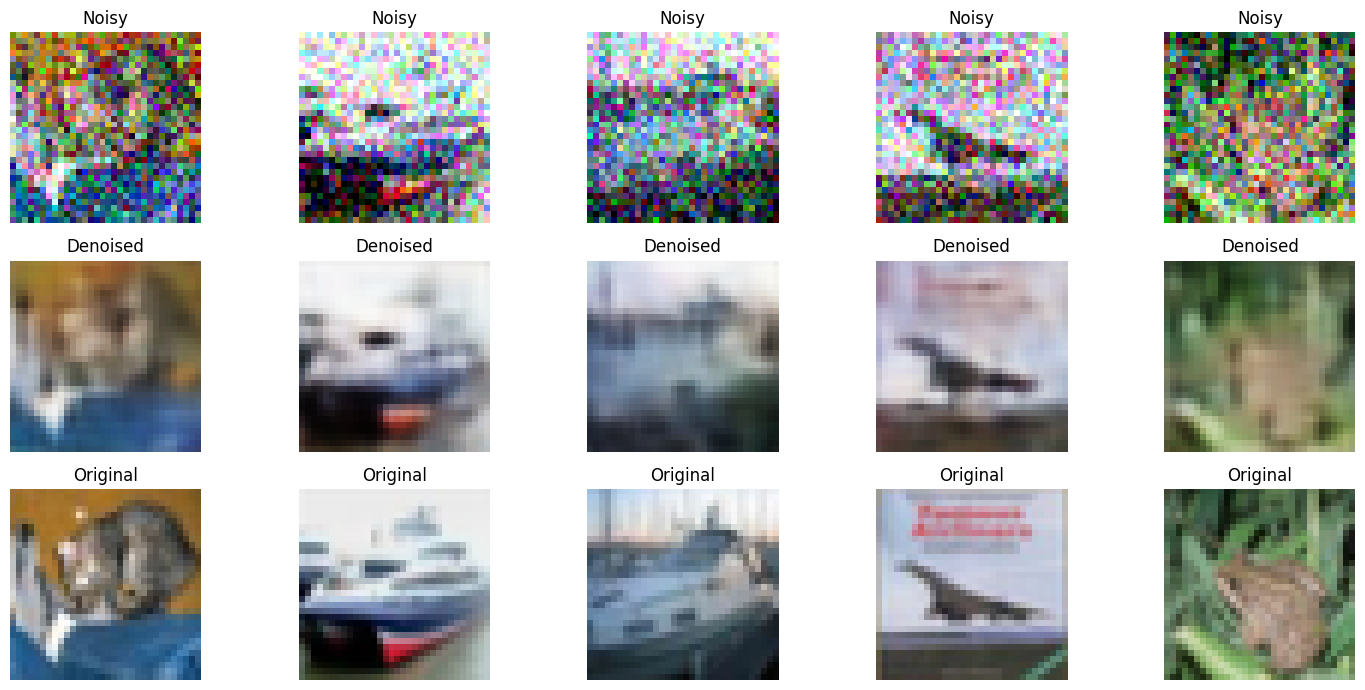

In [5]:
# Visualize Results 
def show_denoising_results(model, noisy_imgs, clean_imgs, n=5):
    decoded_imgs = model.predict(noisy_imgs[:n])

    plt.figure(figsize=(15, 7))
    for i in range(n):
        # Noisy input
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy_imgs[i])
        plt.title("Noisy")
        plt.axis('off')

        # Denoised output
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title("Denoised")
        plt.axis('off')

        # Ground truth
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(clean_imgs[i])
        plt.title("Original")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Show results
show_denoising_results(autoencoder, x_test_noisy, x_test)